In [106]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.patches as mpatches

In [5]:
df = pd.read_csv('Bird Strikes data.csv')
df['FlightDate'] = pd.to_datetime(df['FlightDate'])
df['year'] = df['FlightDate'].dt.year
df['month'] = df['FlightDate'].dt.month

sns.set_theme(style="whitegrid")

C:\Users\prana\AppData\Local\Temp\ipykernel_21172\2641837769.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['FlightDate'] = pd.to_datetime(df['FlightDate'])


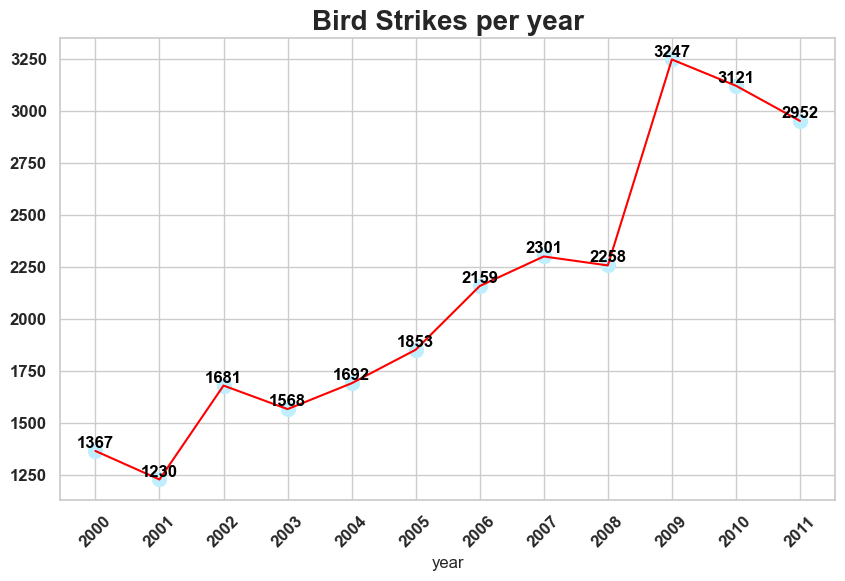

In [23]:
yearly_counts = df['year'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x=yearly_counts.index, y=yearly_counts.values, color="red")
plt.scatter(yearly_counts.index, yearly_counts.values, color="#BFEFFF", s=100)
for year, count in yearly_counts.items():
    plt.text(year, count, str(count), fontsize=12, ha='center', va='bottom', color='black', fontweight='bold')
plt.xticks(np.arange(2000, 2012, 1), rotation=45, fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.title("Bird Strikes per year", fontsize=20, fontweight='bold')
plt.show()


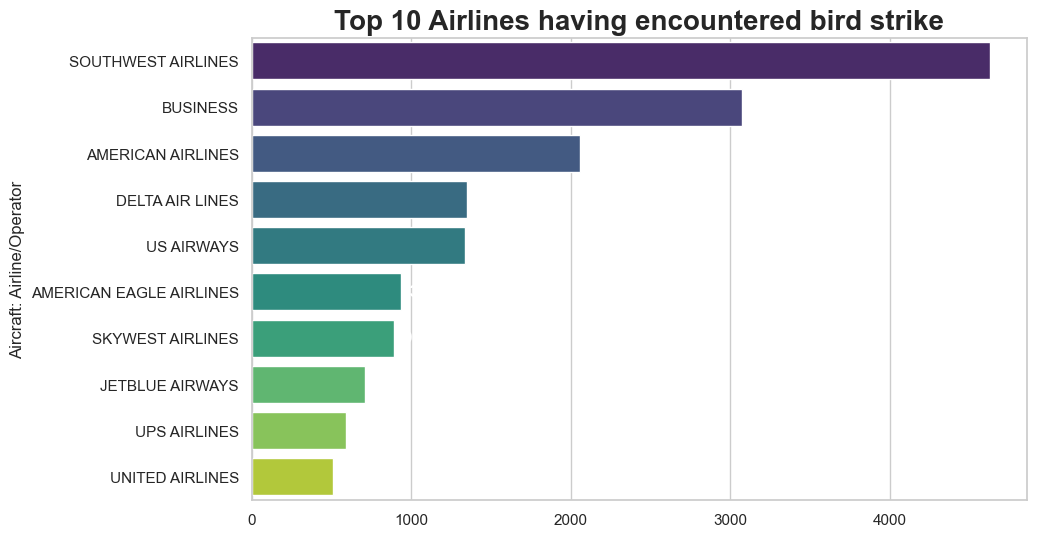

In [30]:
top_airlines = df['Aircraft: Airline/Operator'].str.replace('*', '').value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(y=top_airlines.index, x=top_airlines.values, palette="viridis")
for index, value in enumerate(top_airlines.values):
    plt.text(value, index, str(value), fontsize=12, va='center', ha='left', color='white', fontweight='bold')
plt.title("Top 10 Airlines having encountered bird strike", fontsize=20, fontweight='bold')
plt.show()


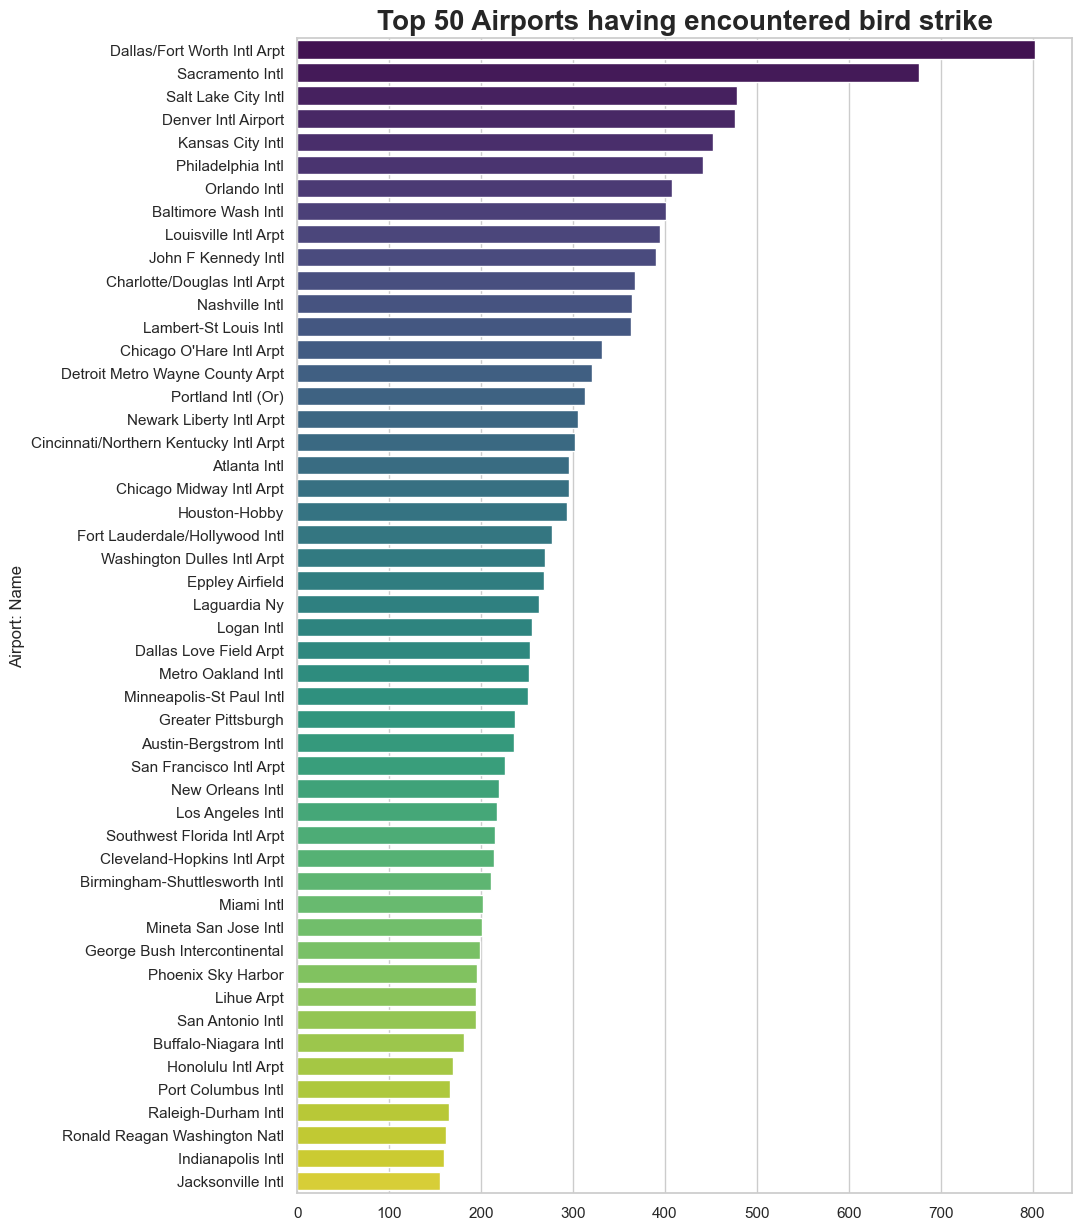

In [31]:
top_airports = df['Airport: Name'].str.title().value_counts().head(50)

plt.figure(figsize=(10, 15))
sns.barplot(y=top_airports.index, x=top_airports.values, palette="viridis")
plt.title("Top 50 Airports having encountered bird strike", fontsize=20, fontweight='bold')
plt.show()


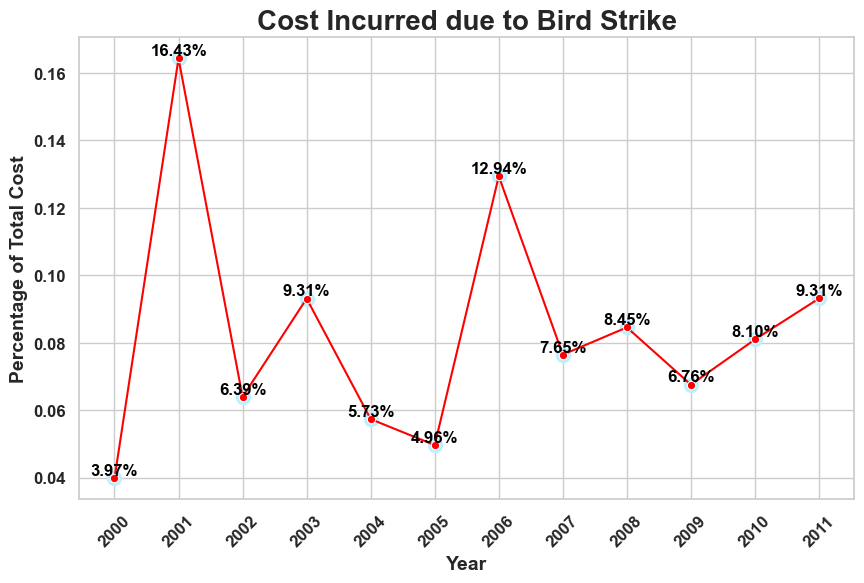

In [13]:
df['year'] = pd.to_numeric(df['year'], errors='coerce')

# Convert 'Cost: Total $' to numeric (removing any non-numeric characters, e.g., $ sign)
df['Cost: Total $'] = df['Cost: Total $'].replace('[\$,]', '', regex=True).astype(float)

# Drop any rows with NaN values in 'year' or 'Cost: Total $'
df = df.dropna(subset=['year', 'Cost: Total $'])

# Calculate the total cost per year
total_cost = df.groupby('year')['Cost: Total $'].sum()
total_cost_percent = total_cost / total_cost.sum()

# Create the line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=total_cost_percent.index, y=total_cost_percent.values, color="red", marker="o")

# Add scatter points
plt.scatter(total_cost_percent.index, total_cost_percent.values, color="#BFEFFF", s=100)

# Add text annotations for each point
for year, percent in total_cost_percent.items():
    plt.text(year, percent, f"{percent:.2%}", fontsize=12, ha='center', va='bottom', color='black', fontweight='bold')

# Customize x-ticks and y-ticks
plt.xticks(np.arange(2000, 2012, 1), rotation=45, fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')

# Set plot title and labels
plt.title("Cost Incurred due to Bird Strike", fontsize=20, fontweight='bold')
plt.xlabel("Year", fontsize=14, fontweight='bold')
plt.ylabel("Percentage of Total Cost", fontsize=14, fontweight='bold')

# Show the plot
plt.show()

C:\Users\prana\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 4000x3000 with 0 Axes>

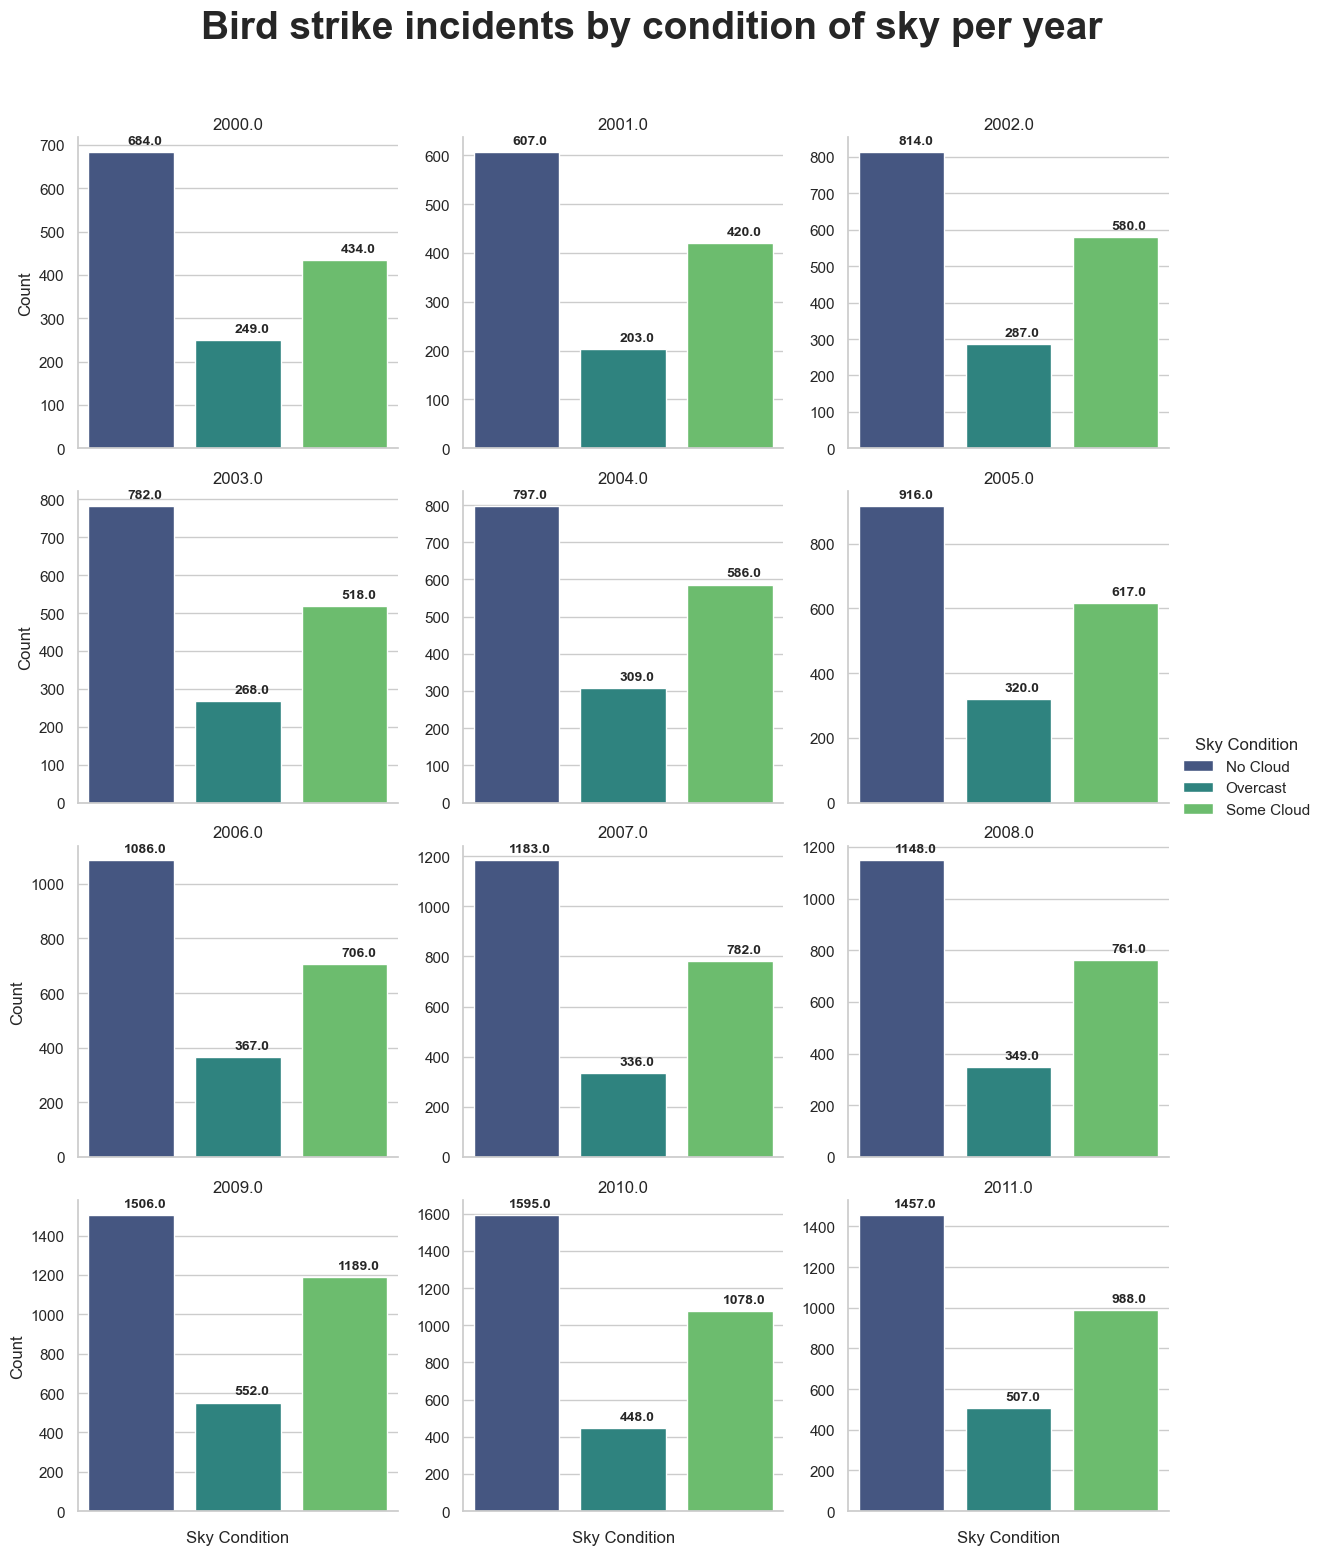

In [42]:
# Group by 'year' and 'Conditions: Sky', then count the number of incidents
sky_condition_yearly_counts = df.groupby(['year', 'Conditions: Sky']).size().reset_index(name='Count')

# Create a FacetGrid for plotting
plt.figure(figsize=(40, 30))
g = sns.FacetGrid(sky_condition_yearly_counts, col='year', col_wrap=3, sharey=False, height=4, aspect=1)
g.map_dataframe(sns.barplot, x='Conditions: Sky', y='Count', hue='Conditions: Sky', palette="viridis", dodge=False)

# Function to add annotations
def add_annotations(ax):
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', fontsize=10, fontweight='bold',
                    xytext=(10, 8), textcoords='offset points')

# Apply the annotation function to each subplot
for ax in g.axes.flat:
    add_annotations(ax)

# Adjust the layout and add titles
g.set_titles("{col_name}")
g.set_axis_labels("Sky Condition", "Count")
g.set_xticklabels(rotation=45, ha='right')  # Rotate labels for better readability
g.add_legend(title='Sky Condition')

# Adjust the top margin of the figure to make space for the main title
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Bird strike incidents by condition of sky per year", fontsize=28, fontweight='bold')

# Display the plot
plt.show()

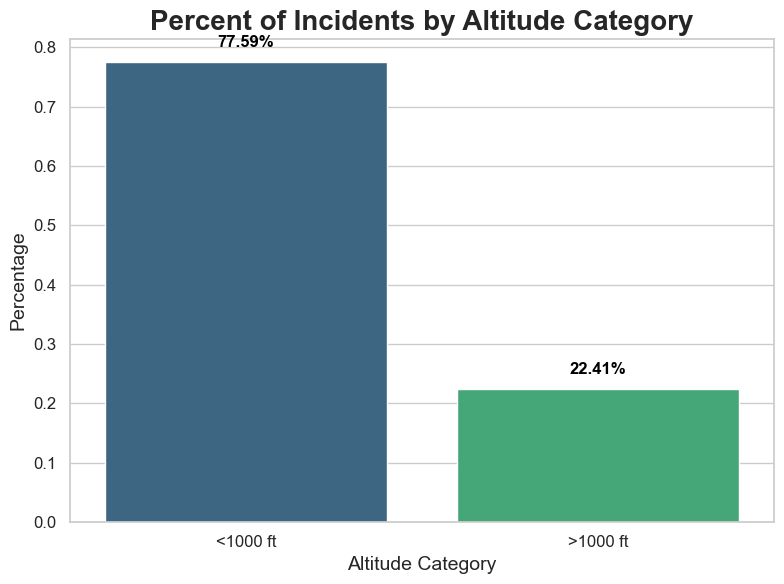

In [47]:

# Convert the 'Feet above ground' column to numeric, forcing errors to NaN and then drop NaN values
df['Feet above ground'] = pd.to_numeric(df['Feet above ground'], errors='coerce')

# Create a new column for altitude classification
df['Altitude Category'] = df['Feet above ground'].apply(lambda x: '<1000 ft' if x < 1000 else '>1000 ft')

# Calculate the normalized value counts (percentages) for the 'Altitude Category' column
altitude_category_counts = df['Altitude Category'].value_counts(normalize=True).sort_index()

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=altitude_category_counts.index, y=altitude_category_counts.values, palette="viridis")

# Add annotations on top of each bar
for index, value in enumerate(altitude_category_counts.values):
    plt.text(index, value + 0.02, f"{value:.2%}", fontsize=12, ha='center', va='bottom', color='black', fontweight='bold')

# Set plot titles and labels
plt.title("Percent of Incidents by Altitude Category", fontsize=20, fontweight='bold')
plt.xlabel("Altitude Category", fontsize=14)
plt.ylabel("Percentage", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Display the plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

C:\Users\prana\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


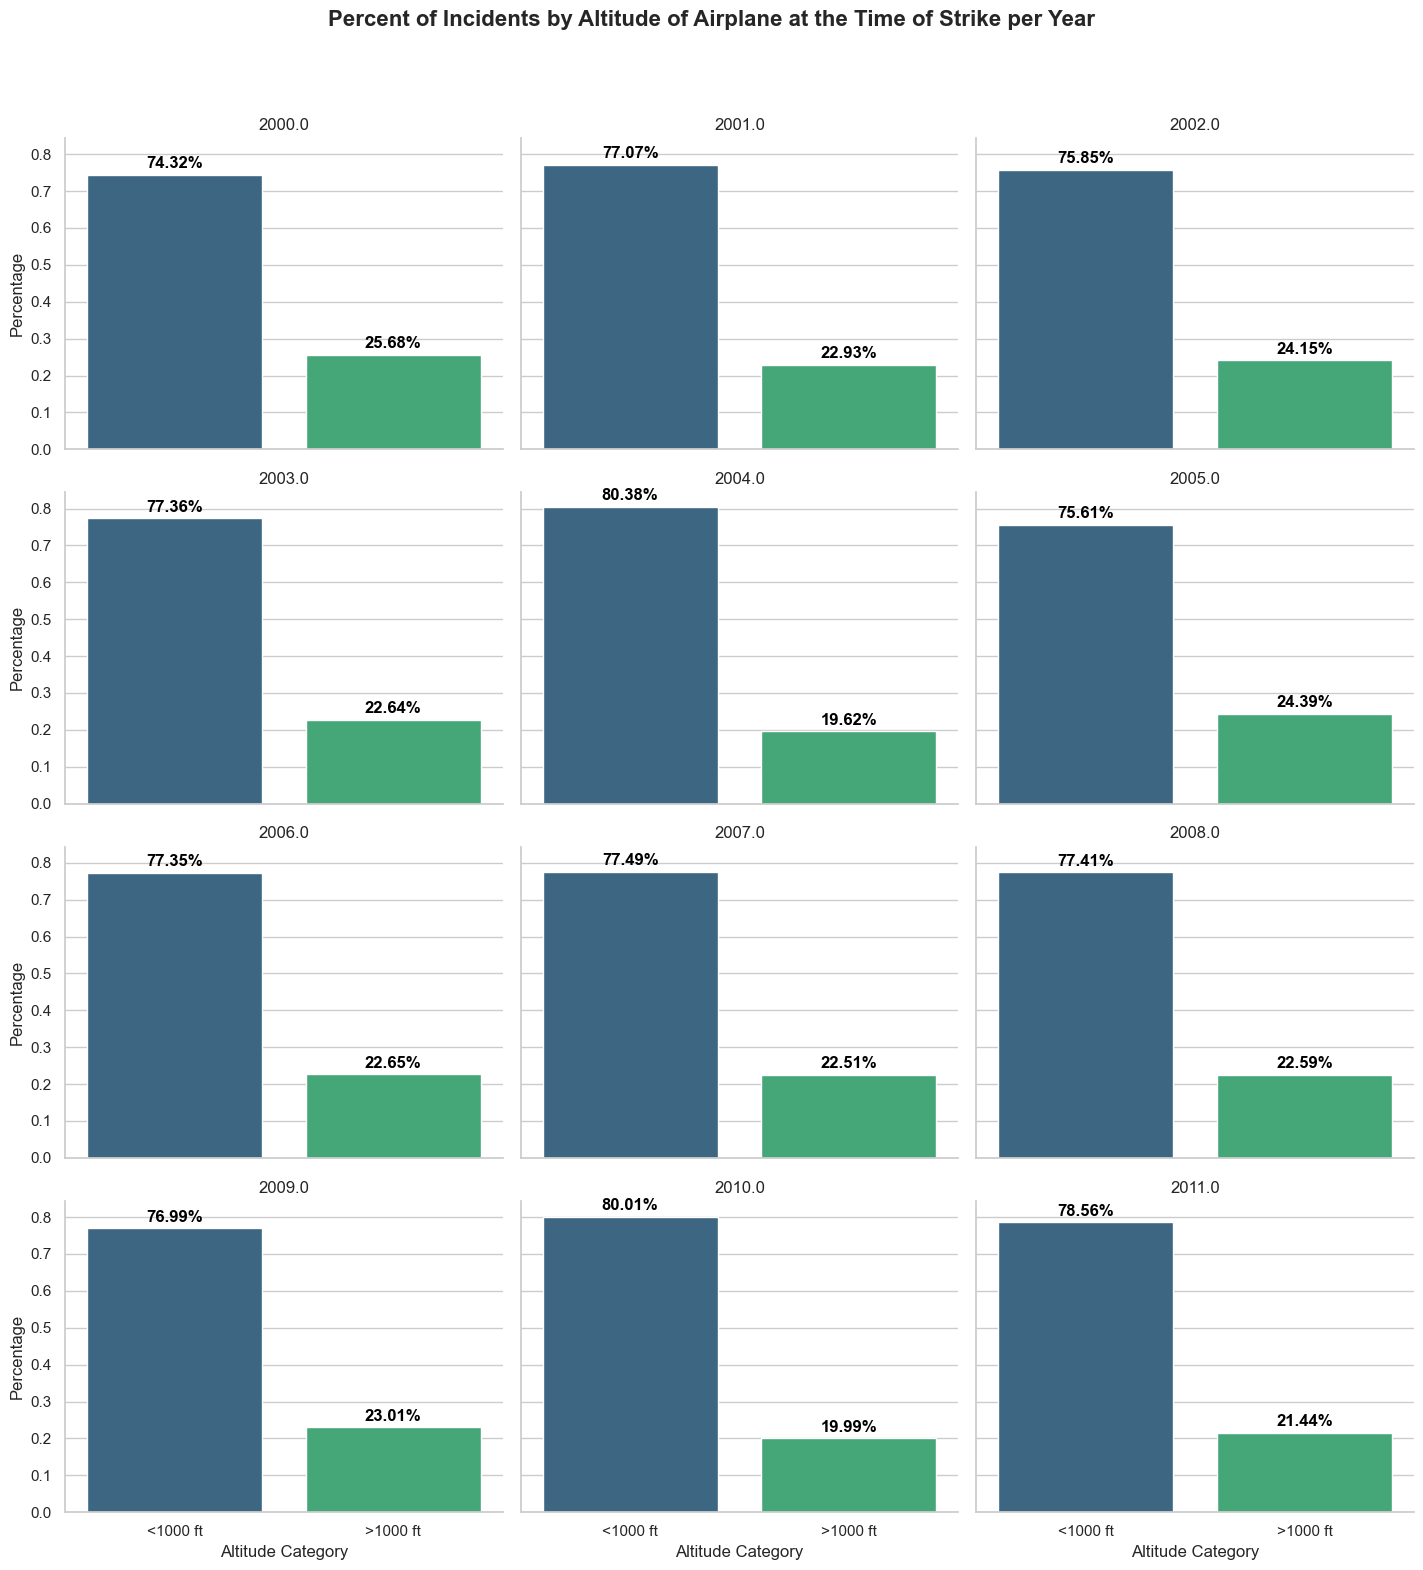

In [58]:
# Convert 'Feet above ground' to numeric, with errors coerced to NaN
df['Feet above ground'] = pd.to_numeric(df['Feet above ground'], errors='coerce')

# Create a new column for altitude classification
df['Altitude Category'] = df['Feet above ground'].apply(lambda x: '<1000 ft' if x < 1000 else '>1000 ft')

# Calculate the count and percentage of incidents by altitude category within each year
df_grouped = df.groupby(['year', 'Altitude Category']).size().reset_index(name='count')
df_grouped['percentage'] = df_grouped.groupby('year')['count'].transform(lambda x: x / x.sum())

# Create the facet plot
g = sns.catplot(x='Altitude Category', y='percentage', kind='bar', col='year', col_wrap=3, data=df_grouped,
                height=4, aspect=1.2, palette="viridis")

# Set titles and labels
g.set_titles("{col_name}")
g.set_axis_labels("Altitude Category", "Percentage")
g.set_xticklabels(rotation=90)

# Add annotations on each bar
for ax in g.axes.flat:
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 0.01,
                f'{height:.2%}', ha="center", va='bottom', color='black', fontsize=12, fontweight='bold')

# Adjust the tick labels to show '<1000 ft' and '>1000 ft'
for ax in g.axes.flat:
    ax.set_xticklabels(['<1000 ft', '>1000 ft'], rotation=0)

# Adjust layout and add a main title
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Percent of Incidents by Altitude of Airplane at the Time of Strike per Year", fontsize=16, fontweight='bold')

# Display the plot
plt.show()

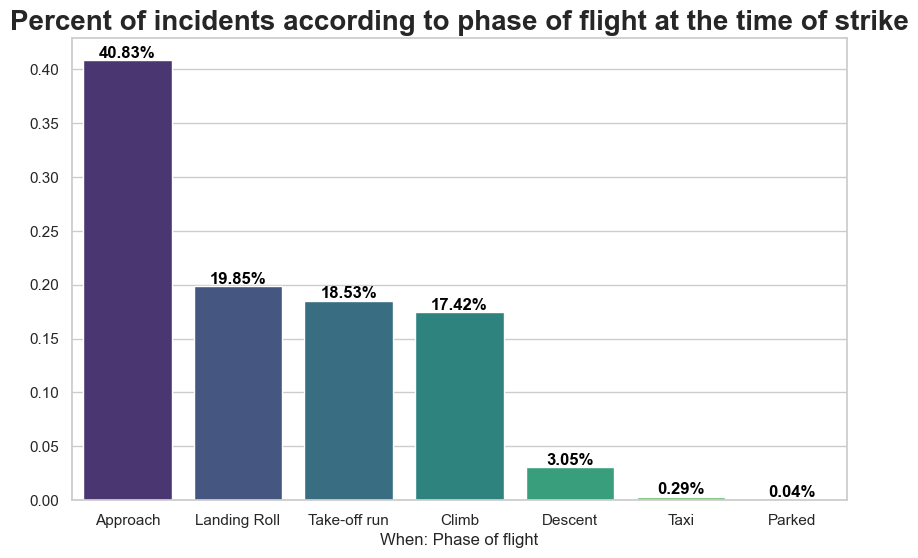

In [37]:
phase_counts = df['When: Phase of flight'].value_counts(normalize=True)

plt.figure(figsize=(10, 6))
sns.barplot(x=phase_counts.index, y=phase_counts.values, palette="viridis")
for index, value in enumerate(phase_counts.values):
    plt.text(index, value, f"{value:.2%}", fontsize=12, ha='center', va='bottom', color='black', fontweight='bold')
plt.title("Percent of incidents according to phase of flight at the time of strike", fontsize=20, fontweight='bold')
plt.show()


C:\Users\prana\AppData\Local\Temp\ipykernel_21172\1584755823.py:21: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(


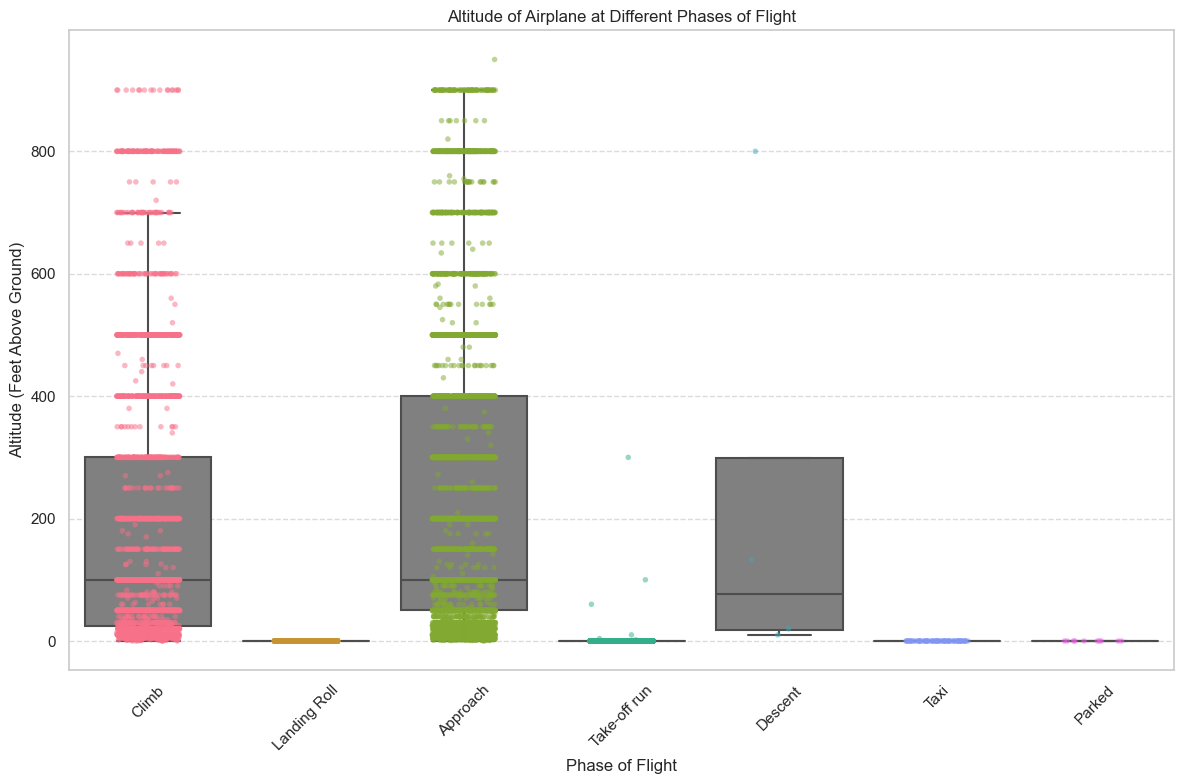

In [118]:
# Filter out rows where 'when_phase_of_flight' is NaN
df_filtered = df.dropna(subset=['When: Phase of flight'])

# Define a color palette (You may need to adjust this to match the R colors exactly)
# This uses seaborn's color_palette or you can specify custom colors.
palette = sns.color_palette("husl", 7)

# Create the plot
plt.figure(figsize=(12, 8))

# Create a boxplot
sns.boxplot(
    x='When: Phase of flight', 
    y='Feet above ground', 
    data=df_filtered, 
    color="grey", 
    showfliers=False
)

# Overlay the jittered points
sns.stripplot(
    x='When: Phase of flight', 
    y='Feet above ground', 
    data=df_filtered, 
    size=4, 
    jitter=0.2, 
    alpha=0.5, 
    palette=palette, 
    edgecolor="red"
)

# Customize the plot
plt.title("Altitude of Airplane at Different Phases of Flight")
plt.xlabel("Phase of Flight")
plt.ylabel("Altitude (Feet Above Ground)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Remove legend (if needed)
plt.legend([], [], frameon=False)

plt.show()

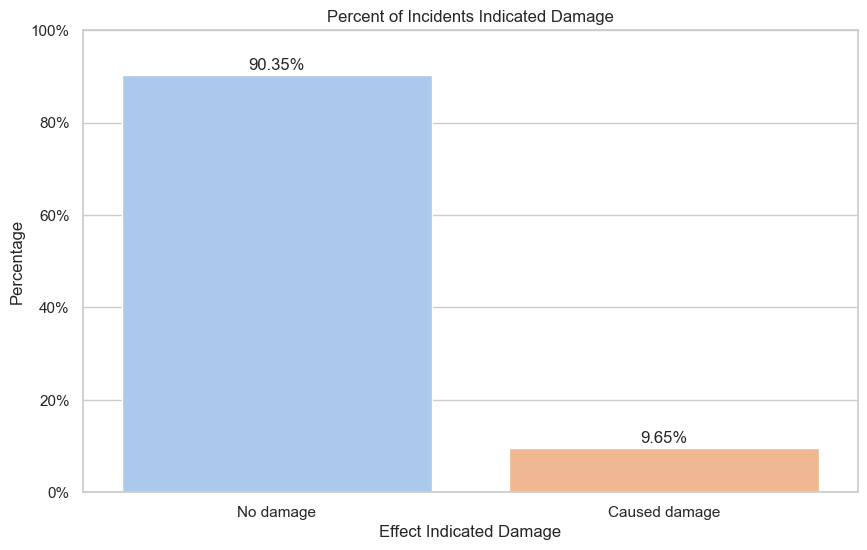

In [120]:
df_filtered = df.dropna(subset=['Effect: Indicated Damage'])
damage_counts = df_filtered['Effect: Indicated Damage'].value_counts().reset_index()
damage_counts.columns = ['Effect: Indicated Damage', 'n']

# Calculate total and percentage
damage_counts['total'] = damage_counts['n'].sum()
damage_counts['per'] = damage_counts['n'] / damage_counts['total']

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=damage_counts, x='Effect: Indicated Damage', y='per', palette='pastel')

# Add percentage labels on top of bars
for i, row in damage_counts.iterrows():
    plt.text(i, row.per + 0.01, f"{round(row.per * 100, 2)}%", ha='center', size=12)

# Customize plot
plt.title("Percent of Incidents Indicated Damage")
plt.xlabel("Effect Indicated Damage")
plt.ylabel("Percentage")
plt.ylim(0, 1)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{int(x * 100)}%"))
plt.xticks(rotation=0)
plt.show()

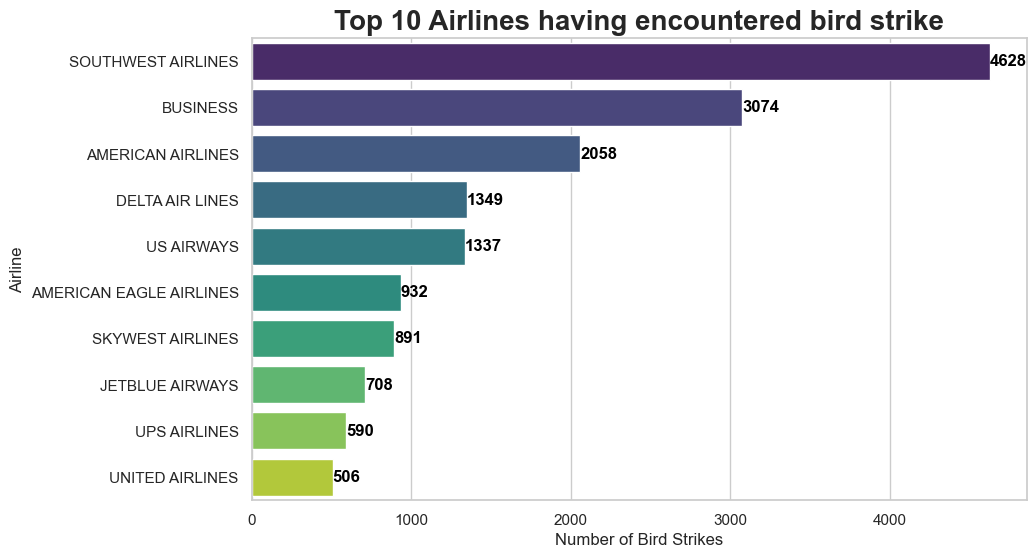

In [11]:
top_airlines = df['Aircraft: Airline/Operator'].str.replace('*', '').value_counts().head(10)

# Create the barplot
plt.figure(figsize=(10, 6))
sns.barplot(y=top_airlines.index, x=top_airlines.values, palette="viridis")

# Add text annotations for each bar
for index, value in enumerate(top_airlines.values):
    plt.text(value, index, f'{value}', fontsize=12, va='center', ha='left', color='black', fontweight='bold')

# Set the title
plt.title("Top 10 Airlines having encountered bird strike", fontsize=20, fontweight='bold')

# Set labels
plt.xlabel('Number of Bird Strikes')
plt.ylabel('Airline')

# Show the plot
plt.show()

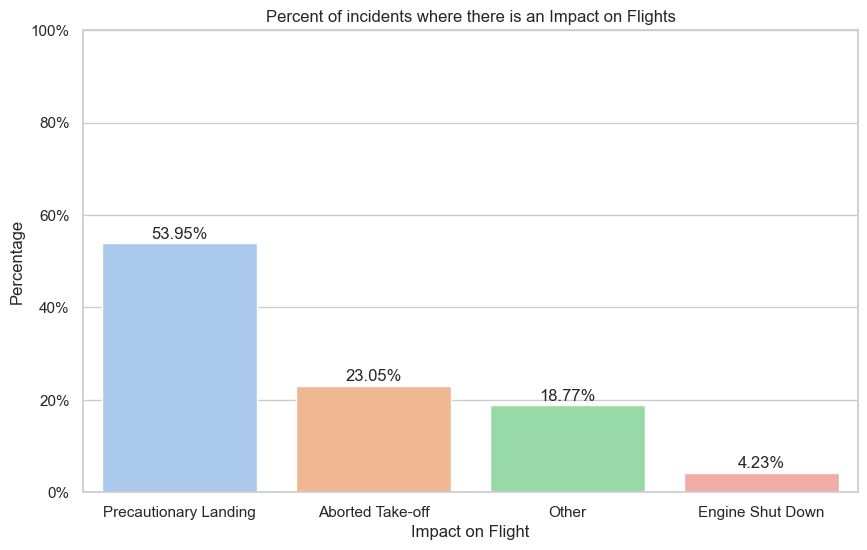

In [121]:
df_filtered = df.dropna(subset=['Effect: Impact to flight'])
impact_counts = df_filtered['Effect: Impact to flight'].value_counts().reset_index()
impact_counts.columns = ['Effect: Impact to flight', 'n']

# Calculate total and percentage
impact_counts['total'] = impact_counts['n'].sum()
impact_counts['per'] = impact_counts['n'] / impact_counts['total']

# Reorder for plotting
impact_counts = impact_counts.sort_values('per', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=impact_counts, x='Effect: Impact to flight', y='per', palette=sns.color_palette("pastel"))

# Add percentage labels on top of bars
for i, row in impact_counts.iterrows():
    plt.text(i, row.per + 0.01, f"{round(row.per * 100, 2)}%", ha='center', size=12)

# Customize plot
plt.title("Percent of incidents where there is an Impact on Flights")
plt.xlabel("Impact on Flight")
plt.ylabel("Percentage")
plt.ylim(0, 1)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{int(x * 100)}%"))
plt.xticks(rotation=0)
plt.show()

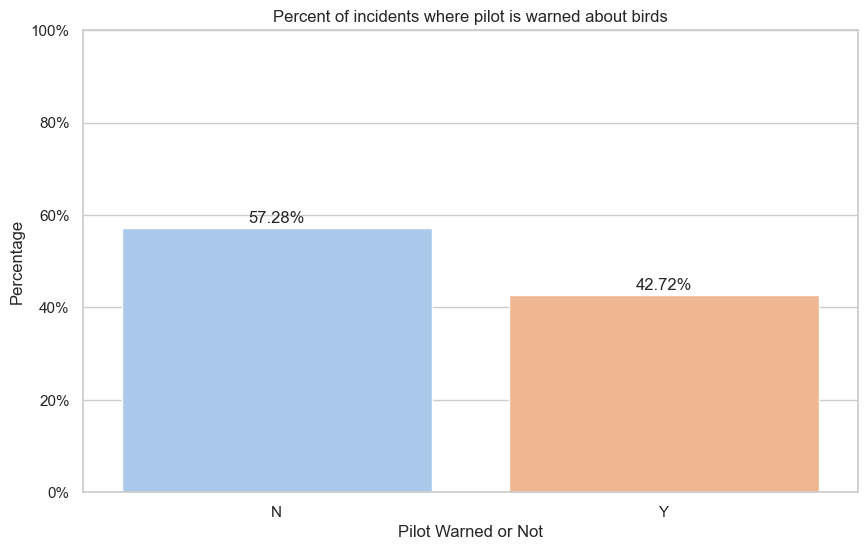

In [122]:
# Filter out rows with missing 'pilot_warned_of_birds_or_wildlife' and count the occurrences
df_filtered = df.dropna(subset=['Pilot warned of birds or wildlife?'])
warning_counts = df_filtered['Pilot warned of birds or wildlife?'].value_counts().reset_index()
warning_counts.columns = ['Pilot warned of birds or wildlife?', 'n']

# Calculate total and percentage
warning_counts['total'] = warning_counts['n'].sum()
warning_counts['per'] = warning_counts['n'] / warning_counts['total']

# Reorder for plotting
warning_counts = warning_counts.sort_values('per', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=warning_counts, x='Pilot warned of birds or wildlife?', y='per', palette=sns.color_palette("pastel"))

# Add percentage labels on top of bars
for i, row in warning_counts.iterrows():
    plt.text(i, row.per + 0.01, f"{round(row.per * 100, 2)}%", ha='center', size=12)

# Customize plot
plt.title("Percent of incidents where pilot is warned about birds")
plt.xlabel("Pilot Warned or Not")
plt.ylabel("Percentage")
plt.ylim(0, 1)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{int(x * 100)}%"))
plt.xticks(rotation=0)
plt.show()

C:\Users\prana\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


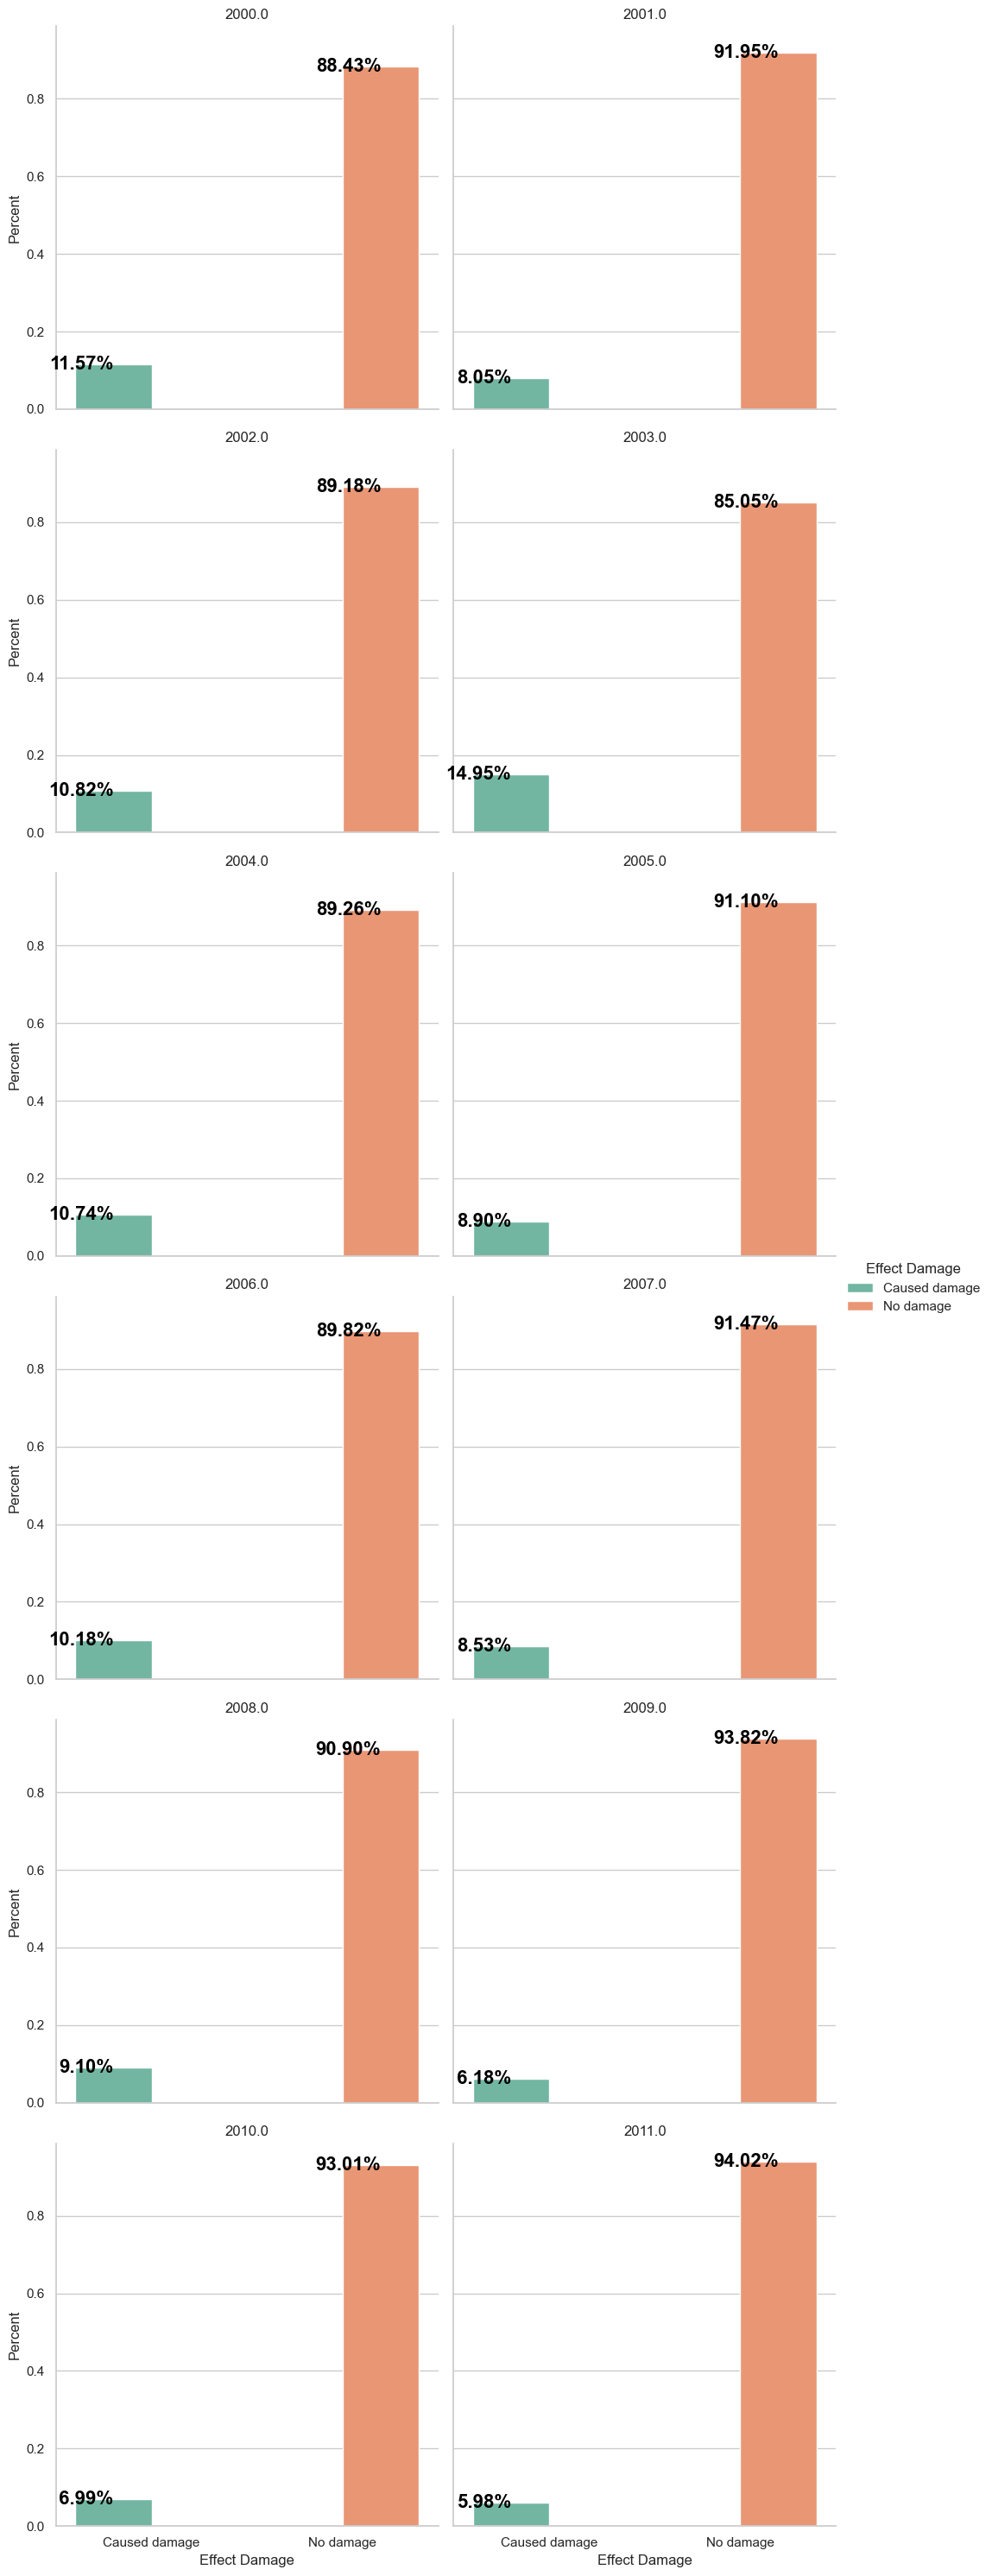

In [84]:
df_warned = df[df['Pilot warned of birds or wildlife?'] == 'Y']

# Calculate counts and percentages
df_count = (df_warned
    .groupby(['year', 'Effect: Indicated Damage'])
    .size()
    .reset_index(name='n'))

df_count['total'] = df_count.groupby('year')['n'].transform('sum')
df_count['per'] = df_count['n'] / df_count['total']

# Set a color palette; adjust as needed
palette = sns.color_palette("Set2", n_colors=len(df_count['Effect: Indicated Damage'].unique()))

# Plot using FacetGrid
g = sns.FacetGrid(df_count, col='year', col_wrap=2, height=5, aspect=1)

g.map_dataframe(sns.barplot, x='Effect: Indicated Damage', y='per', hue='Effect: Indicated Damage', palette=palette)

# Add percentage labels
for ax in g.axes.flat:
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        ax.annotate(f'{height:.2%}', (x + width / 2, y + height), ha='right', va='center', color='black', fontsize=16, fontweight='bold')

# Customize plots
g.set_axis_labels('Effect Damage', 'Percent')
g.set_titles(col_template="{col_name}")
g.add_legend(title='Effect Damage')


plt.show()

In [123]:
# Filter for non-null values in 'wildlife_number_struck'
df_filtered = df[df['Wildlife: Number Struck Actual'].notna()]

# Group by 'effect_indicated_damage' and count occurrences of 'wildlife_number_struck'
damage_counts = df_filtered.groupby(['Effect: Indicated Damage', 'Wildlife: Number Struck Actual']).size().reset_index(name='n')

# Calculate total and percentage
damage_counts['total'] = damage_counts.groupby('Effect: Indicated Damage')['n'].transform('sum')
damage_counts['per'] = damage_counts['n'] / damage_counts['total']

# Plotting
g = sns.catplot(
    data=damage_counts, 
    x='Effect: Indicated Damage', y='per', col='Wildlife: Number Struck Actual', kind='bar', 
    col_wrap=4, palette=sns.color_palette("pastel"), height=4, aspect=1
)

# Add percentage labels on top of bars
for ax in g.axes.flat:
    for p in ax.patches:
        ax.annotate(f"{round(p.get_height() * 100, 2)}%", 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', fontsize=10, color='black', 
                    xytext=(0, 10), textcoords='offset points', fontweight='bold')

# Customize plot
g.set_titles("Number of Wildlife Struck: {col_name}")
g.set_axis_labels("Effect Damage", "Percentage")
for ax in g.axes.flat:
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{int(x * 100)}%"))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

g.fig.suptitle("Percent of Incidents According to Wildlife Number Struck", y=1.02)

plt.show()

ValueError: min() arg is an empty sequence

C:\Users\prana\AppData\Local\Temp\ipykernel_21172\4270946984.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_species_counts['total'] = top_species_counts['n'].sum()
C:\Users\prana\AppData\Local\Temp\ipykernel_21172\4270946984.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_species_counts['per'] = top_species_counts['n'] / top_species_counts['total']
C:\Users\prana\AppData\Local\Temp\ipykernel_21172\4270946984.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator

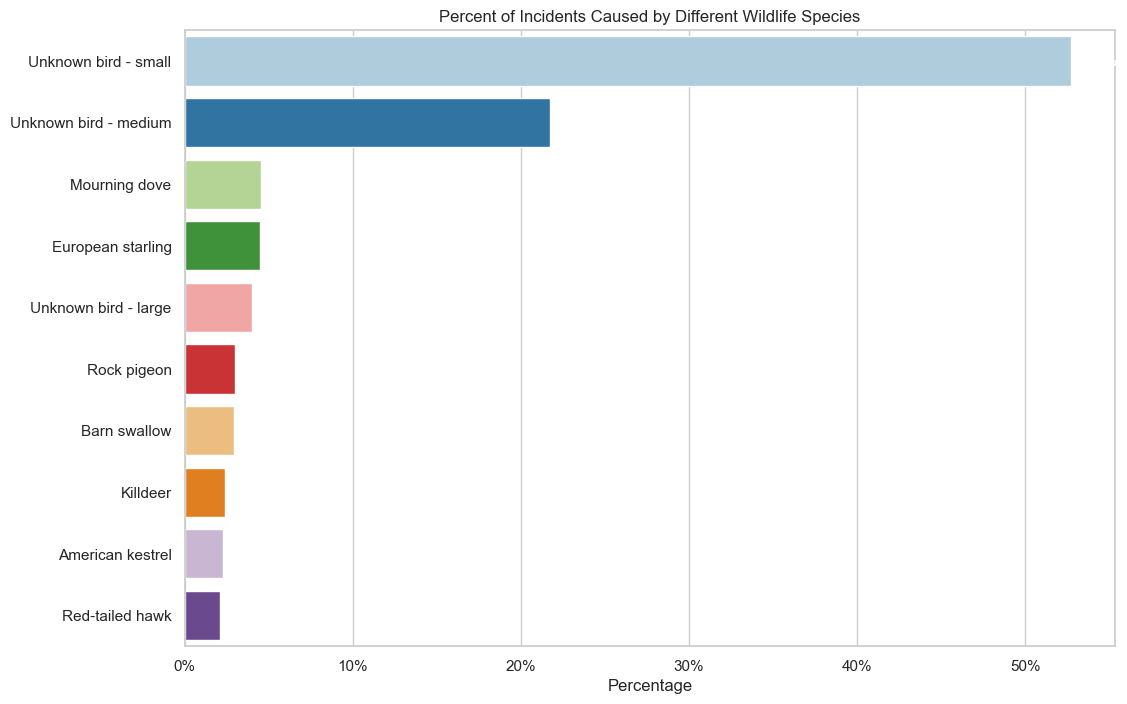

In [124]:
# Filter out rows with NA in 'wildlife_species'
df_filtered = df[df['Wildlife: Species'].notna()]

# Count occurrences of each 'wildlife_species'
species_counts = df_filtered['Wildlife: Species'].value_counts().reset_index()
species_counts.columns = ['Wildlife: Species', 'n']

# Get top 10 species
top_species_counts = species_counts.head(10)

# Calculate total and percentage
top_species_counts['total'] = top_species_counts['n'].sum()
top_species_counts['per'] = top_species_counts['n'] / top_species_counts['total']

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(
    data=top_species_counts, 
    x='per', y='Wildlife: Species', 
    palette=sns.color_palette("Paired", n_colors=10)
)

# Add percentage labels on the bars
for index, row in top_species_counts.iterrows():
    plt.text(
        row['per'], index, f"{round(row['per'] * 100, 2)}%", 
        va='center', ha='left', fontsize=12, color='white', 
        fontweight='bold'
    )

# Customize plot
plt.xlabel('Percentage')
plt.ylabel('')
plt.title('Percent of Incidents Caused by Different Wildlife Species')
plt.gca().set_xticklabels(['{:.0f}%'.format(x * 100) for x in plt.gca().get_xticks()])

plt.show()